In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data Preprocessing 

In [1]:
import pandas as pd 
import os 

# create an empty dataframe 
data = pd.DataFrame(columns = ['image_path','label'])

# Define the label/classes

labels = {
    '/kaggle/input/satellite-image-classification/data/cloudy':'Cloudy',
    '/kaggle/input/satellite-image-classification/data/desert':'Desert',
    '/kaggle/input/satellite-image-classification/data/green_area':'Green_Area',
    '/kaggle/input/satellite-image-classification/data/water':'Water',
    
}

In [2]:
data_list = []

for folder in labels:
    for image_name in os.listdir(folder):
        image_path = os.path.join(folder, image_name)
        label = labels[folder]
        data_list.append({'image_path':image_path,'label':label})

data = pd.DataFrame(data_list)

In [3]:
data.to_csv('image_dataset.csv',index=False)

In [4]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

2025-08-24 14:13:04.109646: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756044784.132137     565 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756044784.139134     565 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
df = pd.read_csv("/kaggle/working/image_dataset.csv")

In [6]:
df

,image_path,label
0,/kaggle/input/satellite-image-classification/d...,Cloudy
1,/kaggle/input/satellite-image-classification/d...,Cloudy
2,/kaggle/input/satellite-image-classification/d...,Cloudy
3,/kaggle/input/satellite-image-classification/d...,Cloudy
4,/kaggle/input/satellite-image-classification/d...,Cloudy
...,...,...
5626,/kaggle/input/satellite-image-classification/d...,Water
5627,/kaggle/input/satellite-image-classification/d...,Water
5628,/kaggle/input/satellite-image-classification/d...,Water
5629,/kaggle/input/satellite-image-classification/d...,Water


In [7]:
# split the dataset into train and test 

train_df, test_df = train_test_split(df, test_size=0.2, random_state = 42)

In [ ]:
# preprocess the data

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  rotation_range = 45,
                                  vertical_flip = True,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(dataframe = train_df,
                                                   x_col = "image_path",
                                                   y_col='label',
                                                   target_size = (255,255),
                                                   batch_size = 32,
                                                   class_mode = "categorical")

test_generator = test_datagen.flow_from_dataframe(dataframe = test_df,
                                                 x_col='image_path',
                                                 y_col = 'label',
                                                 target_size = (255,255),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# Deep Learning Model

In [ ]:
# Build a deep learning model

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(255, 255, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,epochs=5,validation_data = test_generator,batch_size = 32)

In [ ]:
n_samples = test_df.shape[0]
n_samples 

In [ ]:
score = model.evaluate(test_generator,steps=n_samples//32+1,)

In [ ]:
from tensorflow.keras.utils import plot_model
from PIL import Image 

plot_model(model, to_file='cnn_model.png',show_shapes=True,show_layer_names=True)
display(Image.open('cnn_model.png'))

## Loss & Accuracy Visualization

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# saving our model

In [ ]:
from tensorflow.keras.models import load_model

model.save("Model.h5")

In [ ]:
# load the model 

model = load_model("Model.h5")

In [ ]:
import numpy as np 

from tensorflow.keras.preprocessing.image import load_img, img_to_array

# define the class name
classes_name = ['Cloud','Desert','Green_Area','Water']

In [ ]:
# Load an image from the test set 
img = load_img("/kaggle/input/satellite-image-classification/data/water/SeaLake_1004.jpg",target_size = (255,255))

In [ ]:
# Convert the image to an array 
img_array = img_to_array(img)
img_array

In [ ]:
img_array.shape

In [ ]:
# Normalize the image pixel values to the range [0,1]

img_array = img_array/255.0
img_array

In [ ]:
img_array = np.reshape(img_array, (1,255,255,3))

# using Our Model For Prediction 

In [ ]:
predict = model.predict(img_array)

In [ ]:
predict[0]

In [ ]:
indeces  = np.argmax(predict[0])

predicted_label = classes_name[indeces]

print(f"The image is: {predicted_label}")

In [ ]:
from sklearn.metrics import confusion_matrix

predictions = model.predict(test_generator)

In [ ]:
predictions.shape


In [ ]:
actual_labels = test_generator.classes

In [ ]:
predicted_labels  = np.argmax(predictions, axis=1)
predicted_labels

In [ ]:
cm = confusion_matrix(actual_labels, predicted_labels)

In [ ]:
print(cm)

In [ ]:
cm.max()

# VGG16

In [8]:
from keras.applications.vgg16 import VGG16
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten

In [9]:
# preprocess the data

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  rotation_range = 45,
                                  vertical_flip = True,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(dataframe = train_df,
                                                   x_col = "image_path",
                                                   y_col='label',
                                                   target_size = (150,150),
                                                   batch_size = 32,
                                                   class_mode = "categorical")

test_generator = test_datagen.flow_from_dataframe(dataframe = test_df,
                                                 x_col='image_path',
                                                 y_col = 'label',
                                                 target_size = (150,150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 4504 validated image filenames belonging to 4 classes.
Found 1127 validated image filenames belonging to 4 classes.


In [10]:
test_generator

In [11]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

I0000 00:00:1756044801.169266     565 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [12]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
    # print(layer)
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable  = False

for layer in conv_base.layers:
    print(layer.name,layer.trainable)


input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [14]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(4,activation = 'softmax'))

In [15]:
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics = ['accuracy'])

In [16]:
history = model.fit(train_generator,epochs = 5,validation_data = test_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


I0000 00:00:1756044805.575328     614 service.cc:148] XLA service 0x7d56300106c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756044805.575364     614 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1756044805.924105     614 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/141 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.2266 - loss: 2.3630 

I0000 00:00:1756044811.006417     614 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


141/141 ━━━━━━━━━━━━━━━━━━━━ 42s 242ms/step - accuracy: 0.2613 - loss: 1.5243 - val_accuracy: 0.2520 - val_loss: 1.3817
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 28s 197ms/step - accuracy: 0.2673 - loss: 1.3789 - val_accuracy: 0.2555 - val_loss: 1.3806
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 28s 199ms/step - accuracy: 0.2766 - loss: 1.3779 - val_accuracy: 0.2520 - val_loss: 1.3809
Epoch 4/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 28s 196ms/step - accuracy: 0.2713 - loss: 1.3789 - val_accuracy: 0.2555 - val_loss: 1.3809
Epoch 5/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 28s 200ms/step - accuracy: 0.2609 - loss: 1.3798 - val_accuracy: 0.2555 - val_loss: 1.3804


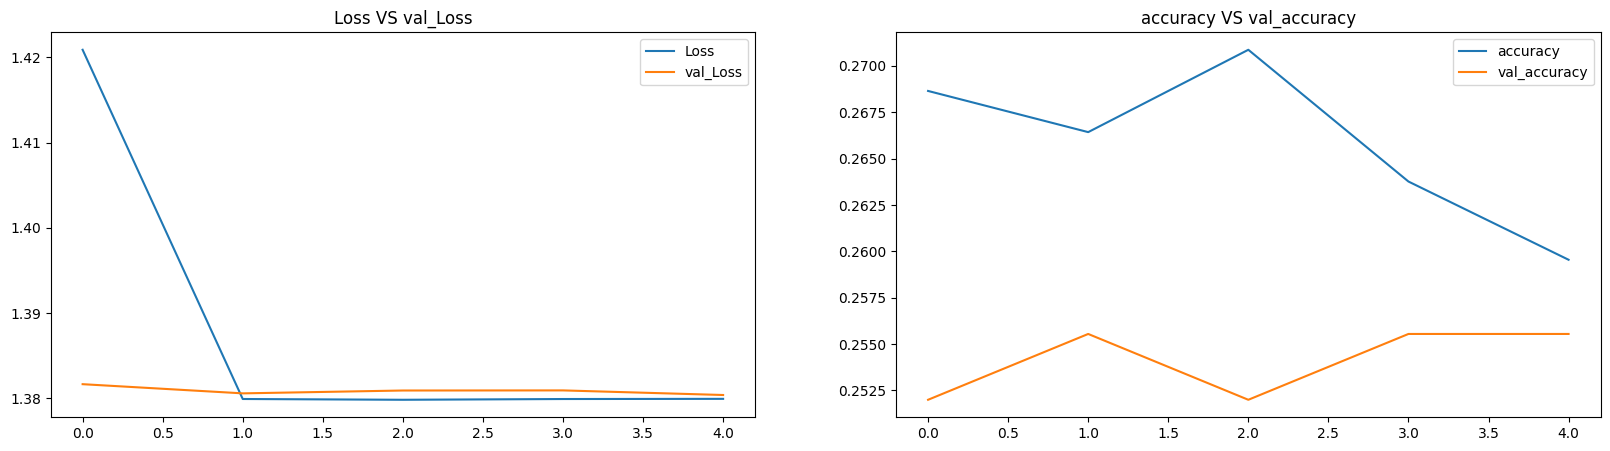

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(history.history['loss'],label = 'Loss')
plt.plot(history.history['val_loss'],label = 'val_Loss')
plt.title("Loss VS val_Loss")
plt.legend()
plt.subplot(122)
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.title("accuracy VS val_accuracy")
plt.legend()
plt.show()

In [18]:
loss, acc = model.evaluate(test_generator)
print(acc)

36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.2688 - loss: 1.3760
0.2555457055568695


In [19]:
from keras.applications import ResNet50

In [20]:
res_base = ResNet50(
    weights='imagenet',
    include_top = False,
    input_shape=(32,32,3)
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [22]:
res_base.trainable = False 

for layer in res_base.layers:
    print(layer.name,' ',layer.trainable)



input_layer_2   False
conv1_pad   False
conv1_conv   False
conv1_bn   False
conv1_relu   False
pool1_pad   False
pool1_pool   False
conv2_block1_1_conv   False
conv2_block1_1_bn   False
conv2_block1_1_relu   False
conv2_block1_2_conv   False
conv2_block1_2_bn   False
conv2_block1_2_relu   False
conv2_block1_0_conv   False
conv2_block1_3_conv   False
conv2_block1_0_bn   False
conv2_block1_3_bn   False
conv2_block1_add   False
conv2_block1_out   False
conv2_block2_1_conv   False
conv2_block2_1_bn   False
conv2_block2_1_relu   False
conv2_block2_2_conv   False
conv2_block2_2_bn   False
conv2_block2_2_relu   False
conv2_block2_3_conv   False
conv2_block2_3_bn   False
conv2_block2_add   False
conv2_block2_out   False
conv2_block3_1_conv   False
conv2_block3_1_bn   False
conv2_block3_1_relu   False
conv2_block3_2_conv   False
conv2_block3_2_bn   False
conv2_block3_2_relu   False
conv2_block3_3_conv   False
conv2_block3_3_bn   False
conv2_block3_add   False
conv2_block3_out   False
conv3_bloc

In [23]:
res_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 38, 38, 3) │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 16, 16,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 16, 16,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 18, 18,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 8, 8, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 64)  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 64)  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 8, 8, 256) │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [24]:
model = Sequential()

model.add(res_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(4,activation = 'softmax'))

In [25]:
# preprocess the data

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  rotation_range = 45,
                                  vertical_flip = True,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(dataframe = train_df,
                                                   x_col = "image_path",
                                                   y_col='label',
                                                   target_size = (32,32),
                                                   batch_size = 32,
                                                   class_mode = "categorical")

test_generator = test_datagen.flow_from_dataframe(dataframe = test_df,
                                                 x_col='image_path',
                                                 y_col = 'label',
                                                 target_size = (32,32),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 4504 validated image filenames belonging to 4 classes.
Found 1127 validated image filenames belonging to 4 classes.


In [26]:
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics = ['accuracy'])

In [27]:
history = model.fit(train_generator,epochs = 5,validation_data=test_generator)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 31s 130ms/step - accuracy: 0.2831 - loss: 1.6978 - val_accuracy: 0.4765 - val_loss: 1.1846
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.4223 - loss: 1.2233 - val_accuracy: 0.4978 - val_loss: 1.0391
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.4646 - loss: 1.0745 - val_accuracy: 0.5315 - val_loss: 0.9535
Epoch 4/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.4994 - loss: 1.0115 - val_accuracy: 0.5484 - val_loss: 0.9272
Epoch 5/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.5055 - loss: 0.9124 - val_accuracy: 0.4907 - val_loss: 0.9336


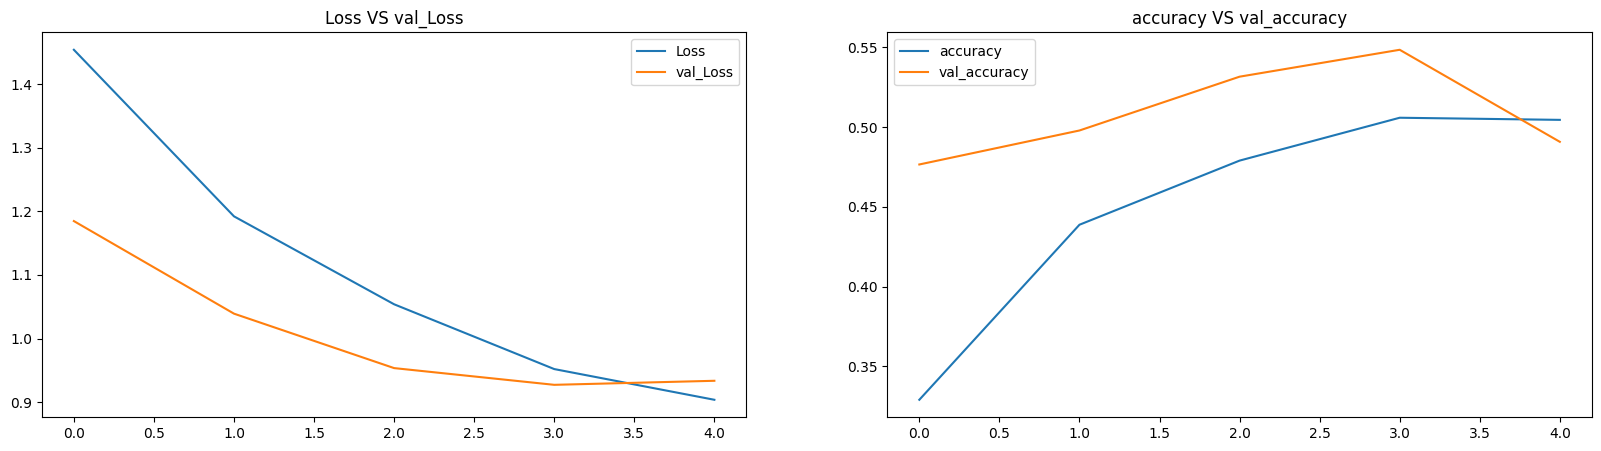

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(history.history['loss'],label = 'Loss')
plt.plot(history.history['val_loss'],label = 'val_Loss')
plt.title("Loss VS val_Loss")
plt.legend()
plt.subplot(122)
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.title("accuracy VS val_accuracy")
plt.legend()
plt.show()

In [29]:
from tensorflow.keras.applications import InceptionV3

In [30]:
incep_base = InceptionV3(
    weights='imagenet',
    include_top = False,
    input_shape=(229,229,3)
)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [31]:
incep_base.trainable = False 


for layer in incep_base.layers:
    print(layer.name,layer.trainable)

input_layer_4 False
conv2d False
batch_normalization False
activation False
conv2d_1 False
batch_normalization_1 False
activation_1 False
conv2d_2 False
batch_normalization_2 False
activation_2 False
max_pooling2d False
conv2d_3 False
batch_normalization_3 False
activation_3 False
conv2d_4 False
batch_normalization_4 False
activation_4 False
max_pooling2d_1 False
conv2d_8 False
batch_normalization_8 False
activation_8 False
conv2d_6 False
conv2d_9 False
batch_normalization_6 False
batch_normalization_9 False
activation_6 False
activation_9 False
average_pooling2d False
conv2d_5 False
conv2d_7 False
conv2d_10 False
conv2d_11 False
batch_normalization_5 False
batch_normalization_7 False
batch_normalization_10 False
batch_normalization_11 False
activation_5 False
activation_7 False
activation_10 False
activation_11 False
mixed0 False
conv2d_15 False
batch_normalization_15 False
activation_15 False
conv2d_13 False
conv2d_16 False
batch_normalization_13 False
batch_normalization_16 False
ac

In [32]:
model = Sequential()

model.add(incep_base)
model.add(Flatten())

model.add(Dense(256, activation ='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(4, activation = 'softmax'))

In [33]:
# preprocess the data

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  rotation_range = 45,
                                  vertical_flip = True,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(dataframe = train_df,
                                                   x_col = "image_path",
                                                   y_col='label',
                                                   target_size = (229,229),
                                                   batch_size = 32,
                                                   class_mode = "categorical")

test_generator = test_datagen.flow_from_dataframe(dataframe = test_df,
                                                 x_col='image_path',
                                                 y_col = 'label',
                                                 target_size = (229,229),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 4504 validated image filenames belonging to 4 classes.
Found 1127 validated image filenames belonging to 4 classes.


In [34]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics= ['accuracy'])

In [35]:
model.fit(train_generator,epochs = 5,validation_data=test_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 87s 492ms/step - accuracy: 0.7643 - loss: 2.1756 - val_accuracy: 0.9299 - val_loss: 0.3133
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 52s 366ms/step - accuracy: 0.9422 - loss: 0.2743 - val_accuracy: 0.9539 - val_loss: 0.1739
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 52s 366ms/step - accuracy: 0.9542 - loss: 0.1931 - val_accuracy: 0.9547 - val_loss: 0.1770
Epoch 4/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 52s 369ms/step - accuracy: 0.9610 - loss: 0.1559 - val_accuracy: 0.9672 - val_loss: 0.1187
Epoch 5/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 52s 369ms/step - accuracy: 0.9653 - loss: 0.1416 - val_accuracy: 0.9716 - val_loss: 0.1143


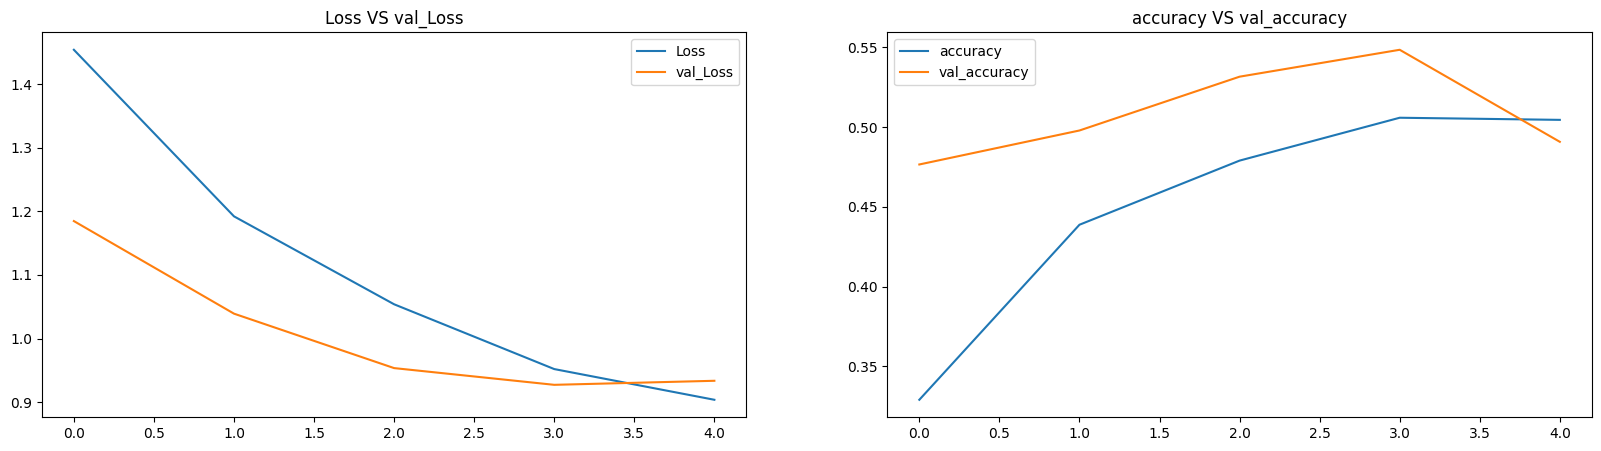

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(history.history['loss'],label = 'Loss')
plt.plot(history.history['val_loss'],label = 'val_Loss')
plt.title("Loss VS val_Loss")
plt.legend()
plt.subplot(122)
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.title("accuracy VS val_accuracy")
plt.legend()
plt.show()

In [36]:
from tensorflow.keras.applications import MobileNet

mob_base = MobileNet(
    weights = 'imagenet',
    include_top = False,
    input_shape = (224,224,3)
)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [40]:
mob_base.trainable = False 

for layer in mob_base.layers:
    print(layer.name, layer.trainable)

input_layer_6 False
conv1 False
conv1_bn False
conv1_relu False
conv_dw_1 False
conv_dw_1_bn False
conv_dw_1_relu False
conv_pw_1 False
conv_pw_1_bn False
conv_pw_1_relu False
conv_pad_2 False
conv_dw_2 False
conv_dw_2_bn False
conv_dw_2_relu False
conv_pw_2 False
conv_pw_2_bn False
conv_pw_2_relu False
conv_dw_3 False
conv_dw_3_bn False
conv_dw_3_relu False
conv_pw_3 False
conv_pw_3_bn False
conv_pw_3_relu False
conv_pad_4 False
conv_dw_4 False
conv_dw_4_bn False
conv_dw_4_relu False
conv_pw_4 False
conv_pw_4_bn False
conv_pw_4_relu False
conv_dw_5 False
conv_dw_5_bn False
conv_dw_5_relu False
conv_pw_5 False
conv_pw_5_bn False
conv_pw_5_relu False
conv_pad_6 False
conv_dw_6 False
conv_dw_6_bn False
conv_dw_6_relu False
conv_pw_6 False
conv_pw_6_bn False
conv_pw_6_relu False
conv_dw_7 False
conv_dw_7_bn False
conv_dw_7_relu False
conv_pw_7 False
conv_pw_7_bn False
conv_pw_7_relu False
conv_dw_8 False
conv_dw_8_bn False
conv_dw_8_relu False
conv_pw_8 False
conv_pw_8_bn False
conv_pw_8_

In [41]:
model = Sequential()

model.add(mob_base)
model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(4,activation = 'softmax'))

In [42]:
# preprocess the data

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  rotation_range = 45,
                                  vertical_flip = True,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(dataframe = train_df,
                                                   x_col = "image_path",
                                                   y_col='label',
                                                   target_size = (224,224),
                                                   batch_size = 32,
                                                   class_mode = "categorical")

test_generator = test_datagen.flow_from_dataframe(dataframe = test_df,
                                                 x_col='image_path',
                                                 y_col = 'label',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 4504 validated image filenames belonging to 4 classes.
Found 1127 validated image filenames belonging to 4 classes.


In [43]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [44]:
history = model.fit(train_generator,epochs = 5, validation_data = test_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 60s 378ms/step - accuracy: 0.8846 - loss: 0.5825 - val_accuracy: 0.9876 - val_loss: 0.1506
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 49s 347ms/step - accuracy: 0.9768 - loss: 0.1368 - val_accuracy: 0.9760 - val_loss: 0.1177
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 48s 343ms/step - accuracy: 0.9858 - loss: 0.0601 - val_accuracy: 0.9778 - val_loss: 0.1104
Epoch 4/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 49s 346ms/step - accuracy: 0.9737 - loss: 0.0976 - val_accuracy: 0.9885 - val_loss: 0.1066
Epoch 5/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 49s 347ms/step - accuracy: 0.9880 - loss: 0.0704 - val_accuracy: 0.9885 - val_loss: 0.0365


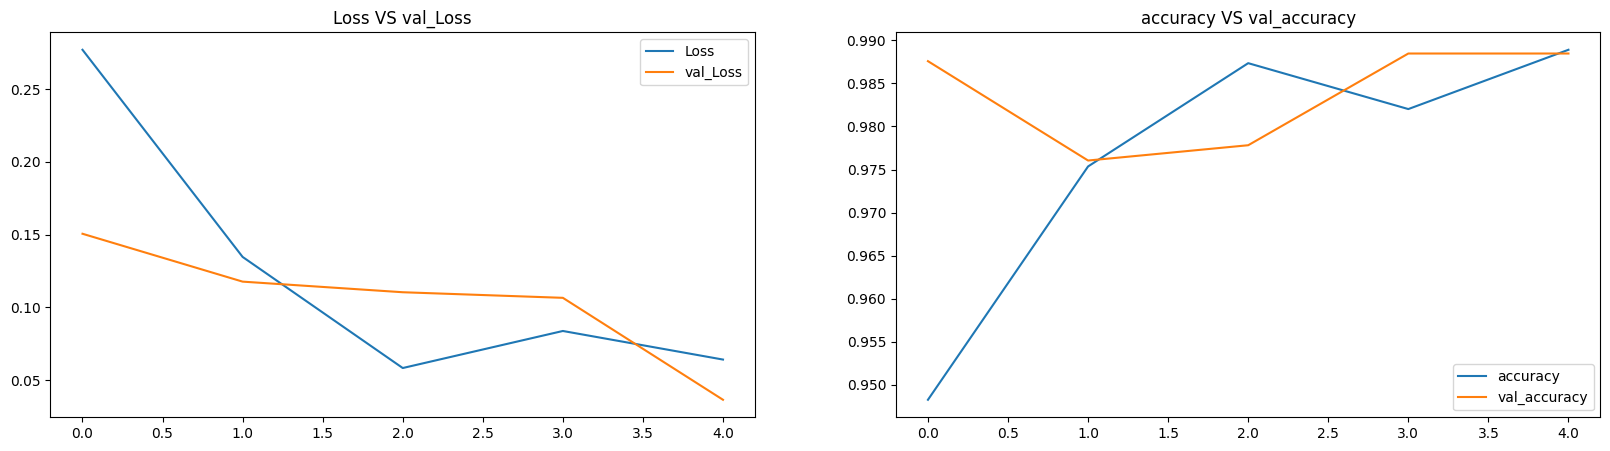

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(history.history['loss'],label = 'Loss')
plt.plot(history.history['val_loss'],label = 'val_Loss')
plt.title("Loss VS val_Loss")
plt.legend()
plt.subplot(122)
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.title("accuracy VS val_accuracy")
plt.legend()
plt.show()